In [15]:
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

def preprocess(filename):
    f = open(filename, 'r')
    data_table = {}
    data_table["data"] = [];
    data_table["target"] = [];
    for line in f.readlines():
        data = line.strip().split(",")
        attribute_values = data[1:-1]
        class_values = data[-1]
        data_table["data"].append(attribute_values)
        data_table["target"].append(class_values)
    
    data_table["data"] = np.array(data_table["data"]).astype(np.float)
    return data_table

class StackingClassifier():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        X_meta = self._predict_base(X)
        self.metaclassifier.fit(X_meta, y)
    
    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = np.concatenate(yhats, axis=1)
        #print(yhats.shape)
        assert yhats.shape[0] == X.shape[0]
        return yhats
    
    def predict(self, X):
        X_meta = self._predict_base(X)
        yhat = self.metaclassifier.predict(X_meta)
        return yhat
    def score(self, X, y):
        yhat = self.predict(X)
        return accuracy_score(y, yhat)

In [2]:
data = []

top10 = preprocess("../2019S1-proj2-data/train-top10.csv");
top10val = preprocess("../2019S1-proj2-data/dev-top10.csv");
X10 = top10["data"]
y10 = top10["target"]
X10val = top10val["data"]
y10val = top10val["target"]

top50 = preprocess("../2019S1-proj2-data/train-top50.csv");
top50val = preprocess("../2019S1-proj2-data/dev-top50.csv");
X50 = top50["data"]
y50 = top50["target"]
X50val = top50val["data"]
y50val = top50val["target"]

top100 = preprocess("../2019S1-proj2-data/train-top100.csv");
top100val = preprocess("../2019S1-proj2-data/dev-top100.csv");
X100 = top100["data"]
y100 = top100["target"]
X100val = top100val["data"]
y100val = top100val["target"]

data.append((X10,y10,X10val,y10val));
data.append((X50,y50,X50val,y50val));
data.append((X100,y100,X100val,y100val));

top10proc = preprocess("../preprocessed/top10train.csv");
top10valproc = preprocess("../preprocessed/top10dev.csv");
X10proc = top10proc["data"]
y10proc = top10proc["target"]
X10valproc = top10valproc["data"]
y10valproc = top10valproc["target"]

top50proc = preprocess("../preprocessed/top50train.csv");
top50valproc = preprocess("../preprocessed/top50dev.csv");
X50proc = top50proc["data"]
y50proc = top50proc["target"]
X50valproc = top50valproc["data"]
y50valproc = top50valproc["target"]

top100proc = preprocess("../preprocessed/top100train.csv");
top100valproc = preprocess("../preprocessed/top100dev.csv");
X100proc = top100proc["data"]
y100proc = top100proc["target"]
X100valproc = top100valproc["data"]
y100valproc = top100valproc["target"]

data.append((X10proc,y10proc,X10valproc,y10valproc));
data.append((X50proc,y50proc,X50valproc,y50valproc));
data.append((X100proc,y100proc,X100valproc,y100valproc));

dataTitles = ['Top10',
              'Top50',
              'Top100',
              'Top10proc',
              'Top50proc',
              'Top100proc']

In [42]:
"""
KNN Models (model that will took considerably long time to run ~30 min)

models = [KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5)]
titles = ['1-Nearest Neighbour',
          '5-Nearest Neighbour']

for ((X,y,Xval,yval),dataTitle) in zip(data,dataTitles):
    # timer on
    start = time.time()
    print("For",dataTitle);

    title_training_acc = {}
    title_validation_acc = {}
    for title, model in zip(titles, models):
        model.fit(X, y)
        title_training_acc[title] = model.score(X, y)
        title_validation_acc[title] = model.score(Xval, yval)
    
    end = time.time()
    print('Time elapsed:',end - start);

    for title in titles:
        print(title, ': Training Acc', title_training_acc[title], '; Validation Acc', title_validation_acc[title])
    
    print("");
    
"""

For Top10
Time elapsed: 1346.61643242836
1-Nearest Neighbour : Training Acc 0.282651600170272 ; Validation Acc 0.2879997856147497
5-Nearest Neighbour : Training Acc 0.2916973027359622 ; Validation Acc 0.2953960767499196

For Top50
Time elapsed: 7286.453837156296
1-Nearest Neighbour : Training Acc 0.31150110289849464 ; Validation Acc 0.29097438096258976
5-Nearest Neighbour : Training Acc 0.32045973453039744 ; Validation Acc 0.30088969878872335

For Top100
Time elapsed: 13718.756433725357
1-Nearest Neighbour : Training Acc 0.32886691691498005 ; Validation Acc 0.2965751956265409
5-Nearest Neighbour : Training Acc 0.3384834178243876 ; Validation Acc 0.3061689355772323



In [5]:
"""
Decision Tree
"""

models = [DecisionTreeClassifier(max_depth=None, criterion = "entropy")]

titles = ['Decision Tree']

for ((X,y,Xval,yval),dataTitle) in zip(data,dataTitles):
    # timer on
    start = time.time()
    print("For",dataTitle);

    title_training_acc = {}
    title_validation_acc = {}
    for title, model in zip(titles, models):
        model.fit(X, y)
        title_training_acc[title] = model.score(X, y)
        title_validation_acc[title] = model.score(Xval, yval)
    
    end = time.time()
    print('Time elapsed:',end - start);

    for title in titles:
        print(title, ': Training Acc', title_training_acc[title], '; Validation Acc', title_validation_acc[title])
    
    print("");

# title_crossvalidation_acc = {}
# for title, model in zip(titles, models):
#     title_crossvalidation_acc[title] = np.mean(cross_val_score(model, X, y, cv=10))

For Top10
Time elapsed: 1.0023233890533447
Decision Tree : Training Acc 0.2932839286405325 ; Validation Acc 0.29553006753135386

For Top50
Time elapsed: 27.084620237350464
Decision Tree : Training Acc 0.33005688634340774 ; Validation Acc 0.3008629006324365

For Top100
Time elapsed: 82.08282089233398
Decision Tree : Training Acc 0.35039278665686313 ; Validation Acc 0.3071872655161325

For Top10proc
Time elapsed: 0.9032161235809326
Decision Tree : Training Acc 0.30800859099880035 ; Validation Acc 0.31704898702969236

For Top50proc
Time elapsed: 20.48679542541504
Decision Tree : Training Acc 0.3368677682752215 ; Validation Acc 0.32037195840926147

For Top100proc
Time elapsed: 3286.011438846588
Decision Tree : Training Acc 0.5909697767114276 ; Validation Acc 0.3134044377746811



In [14]:
"""
Naive Bayes
"""
models = [GaussianNB(),
          MultinomialNB(alpha=1.0),
          MultinomialNB(alpha=0.5),
          MultinomialNB(alpha=0),
          BernoulliNB()]

titles = ['Gaussian Naive Bayes',
          'Multinomial Naive Bayes laplace smoothing',
          'Multinomial Naive Bayes 0.5 smoothing',
          'Multinomial Naive Bayes no smoothing',
          'Binomial Naive Bayes']

for ((X,y,Xval,yval),dataTitle) in zip(data,dataTitles):
    # timer on
    start = time.time()
    print("For",dataTitle);

    title_training_acc = {}
    title_validation_acc = {}
    for title, model in zip(titles, models):
        model.fit(X, y)
        title_training_acc[title] = model.score(X, y)
        title_validation_acc[title] = model.score(Xval, yval)
    
    end = time.time()
    print('Time elapsed:',end - start);

    for title in titles:
        print(title, ': Training Acc', title_training_acc[title], '; Validation Acc', title_validation_acc[title])
    
    print("");
        
# title_crossvalidation_acc = {}
# for title, model in zip(titles, models):
#     title_crossvalidation_acc[title] = np.mean(cross_val_score(model, X, y, cv=10))

TypeError: 'GaussianNB' object is not callable

In [5]:
multiNBbagging = BaggingClassifier(base_estimator= MultinomialNB(), max_samples = 0.35, max_features = 0.9)
# adaMNB = AdaBoostClassifier(base_estimator=MultinomialNB(), n_estimators=100)

models = [multiNBbagging]

titles = ['Multinomial Naive Bayes laplace smoothing']


for ((X,y,Xval,yval),dataTitle) in zip(data,dataTitles):
    # timer on
    start = time.time()
    print("For",dataTitle);
    
    title_training_acc = {}
    title_validation_acc = {}
    for title, model in zip(titles, models):
        model.fit(X, y)
        title_training_acc[title] = model.score(X, y)
        title_validation_acc[title] = model.score(Xval, yval)
    
    end = time.time()
    print('Time elapsed:',end - start);

    for title in titles:
        print(title, ': Training Acc', title_training_acc[title], '; Validation Acc', title_validation_acc[title])
    
    print("");


For Top10
Time elapsed: 1.8790628910064697
Multinomial Naive Bayes laplace smoothing : Training Acc 0.2899365349638172 ; Validation Acc 0.2931450316218244

For Top50
Time elapsed: 8.93866777420044
Multinomial Naive Bayes laplace smoothing : Training Acc 0.3085310166015247 ; Validation Acc 0.2941365634044378

For Top100
Time elapsed: 17.899472951889038
Multinomial Naive Bayes laplace smoothing : Training Acc 0.33721605201037114 ; Validation Acc 0.30624933004609284

For Top10proc
Time elapsed: 2.0889976024627686
Multinomial Naive Bayes laplace smoothing : Training Acc 0.3065380596726133 ; Validation Acc 0.3171293814985529

For Top50proc
Time elapsed: 8.719229459762573
Multinomial Naive Bayes laplace smoothing : Training Acc 0.33139197399481446 ; Validation Acc 0.31694179440454495

For Top100proc
Time elapsed: 83.04063034057617
Multinomial Naive Bayes laplace smoothing : Training Acc 0.4061375333771913 ; Validation Acc 0.32838460713902884



In [4]:
"""
Stacking Classifier
"""

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 

# Use only the first stacked classifier for the report
multiNBbagging = BaggingClassifier(base_estimator= MultinomialNB(), max_samples = 0.35, max_features = 0.9)
adaMNB = AdaBoostClassifier(base_estimator=MultinomialNB())

classifiers = [RandomForestClassifier(),
               multiNBbagging]

#meta_classifier = LogisticRegression(solver="saga")

meta_classifier = DecisionTreeClassifier(max_depth=None)

RFMNBstacker = StackingClassifier(classifiers, meta_classifier)

classifiers = [adaMNB,
               multiNBbagging]

#meta_classifier = LogisticRegression(solver="saga")
meta_classifier = DecisionTreeClassifier(max_depth=None)

BMNBAMNBstacker = StackingClassifier(classifiers, meta_classifier)


models = [RFMNBstacker,
          BMNBAMNBstacker]

titles = ['RF & B MNB Stacker',
          'B MNB & A MNB Stacker']

for ((X,y,Xval,yval),dataTitle) in zip(data,dataTitles):
    # timer on
    start = time.time()
    print("For",dataTitle);

    title_training_acc = {}
    title_validation_acc = {}
    for title, model in zip(titles, models):
        model.fit(X, y)
        title_training_acc[title] = model.score(X, y)
        title_validation_acc[title] = model.score(Xval, yval)
    
    end = time.time()
    print('Time elapsed:',end - start);

    for title in titles:
        print(title, ': Training Acc', title_training_acc[title], '; Validation Acc', title_validation_acc[title])
    
    print("");


For Top10


C:\Users\patpa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time elapsed: 22.44383454322815
RF & B MNB Stacker : Training Acc 0.2932839286405325 ; Validation Acc 0.295503269375067
B MNB & A MNB Stacker : Training Acc 0.2932839286405325 ; Validation Acc 0.2946993246864616

For Top50
Time elapsed: 63.031413078308105
RF & B MNB Stacker : Training Acc 0.33005688634340774 ; Validation Acc 0.30013935041269163
B MNB & A MNB Stacker : Training Acc 0.33005688634340774 ; Validation Acc 0.2997909743809626

For Top100
Time elapsed: 120.04740285873413
RF & B MNB Stacker : Training Acc 0.35039278665686313 ; Validation Acc 0.30683888948440347
B MNB & A MNB Stacker : Training Acc 0.35039278665686313 ; Validation Acc 0.30705327473469823

For Top10proc
Time elapsed: 22.943710803985596
RF & B MNB Stacker : Training Acc 0.30800859099880035 ; Validation Acc 0.31710258334226604
B MNB & A MNB Stacker : Training Acc 0.30800859099880035 ; Validation Acc 0.3193000321577875

For Top50proc
Time elapsed: 61.762388944625854
RF & B MNB Stacker : Training Acc 0.33686776827522

In [5]:
"""
Preprocess the test data
"""

top100testproc = preprocess("../preprocessed/top100test.csv");
X100testproc = top100testproc["data"]
y100testproc = top100testproc["target"]
top10testproc = preprocess("../preprocessed/top10test.csv");
X10testproc = top10testproc["data"]
y10testproc = top10testproc["target"]
top50testproc = preprocess("../preprocessed/top50test.csv");
X50testproc = top50testproc["data"]
y50testproc = top50testproc["target"]


In [8]:
# Try training using training and development sets
X100proc
X100valproc
y100proc
y100valproc
ultimateX = []
ultimatey = []

for i in X100proc:
    ultimateX.append(i)
for i in X100valproc:
    ultimateX.append(i)
for i in y100proc:
    ultimatey.append(i)
for i in y100valproc:
    ultimatey.append(i)

In [22]:
"""
Choose the best model to use for submission
"""

multiNBbagging = BaggingClassifier(base_estimator= MultinomialNB(), max_samples = 0.35, max_features = 0.9, warm_start=True)

#DecisionTree = DecisionTreeClassifier(max_depth=None, criterion = "entropy")

#GaussianNB = GaussianNB()
#MultinomialNB = MultinomialNB(alpha = 1.0)
#BernoulliNB = BernoulliNB()

#multiNBbagging = BaggingClassifier(base_estimator= MultinomialNB(), max_samples = 0.35, max_features = 0.9)
#adaMNB = AdaBoostClassifier(base_estimator=MultinomialNB())

classifiers = [RandomForestClassifier(), multiNBbagging]

meta_classifier = DecisionTreeClassifier(max_depth=None)

RFMNBstacker = StackingClassifier(classifiers, meta_classifier)



# clf.fit(data_transformed, digits.target)

# model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial', max_iter=100, warm_start=True)

model = RFMNBstacker

model.fit(X100proc,y100proc)

model.score(X100valproc,y100valproc)

C:\Users\patpa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\patpa\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:351: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


0.31720977596741345

In [ ]:
"""
Make the submission csv based on the best model
"""

header = ['Id','Class']

predictionArray = model.predict(X100testproc)
len(predictionArray)
with open('../submission.csv',"w+") as file:
    line = "{},{}".format(header[0],header[1])
    file.write(line)
    file.write('\n')
    

    index = 1
    for prediction in predictionArray:
        line = "3{},{}".format(index, prediction)
        file.write(line)
        file.write('\n')
        index += 1


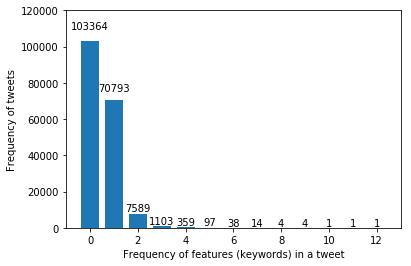

In [21]:
#Plot frequency of preprocessed tokens
token_freq_dict = {}
index = 0
for arr in X100proc:
    for freq in arr:
        if(freq not in token_freq_dict):
            token_freq_dict[freq] = set()
        token_freq_dict[freq].add(index)
    
    index += 1
    
frequency_dict = {}
for key, val in token_freq_dict.items():
    frequency_dict[key] = len(token_freq_dict[key])

fig, ax = plt.subplots()
rects1 = ax.bar(frequency_dict.keys(), frequency_dict.values(), 0.75)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
ax.set_ylim(0, 120000)
autolabel(rects1)

plt.xlabel('Frequency of features (keywords) in a tweet')
plt.ylabel('Frequency of tweets')
plt.show()

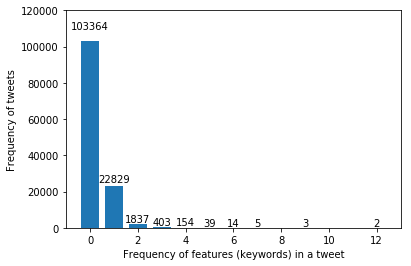

In [22]:
#Plot frequency of default tokens
token_freq_dict = {}
index = 0
for arr in X100:
    for freq in arr:
        if(freq not in token_freq_dict):
            token_freq_dict[freq] = set()
        token_freq_dict[freq].add(index)
    
    index += 1
    
frequency_dict = {}
for key, val in token_freq_dict.items():
    frequency_dict[key] = len(token_freq_dict[key])
    
fig, ax = plt.subplots()
rects1 = ax.bar(frequency_dict.keys(), frequency_dict.values(), 0.75)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
ax.set_ylim(0, 120000)
autolabel(rects1)

plt.xlabel('Frequency of features (keywords) in a tweet')
plt.ylabel('Frequency of tweets')
plt.show()